# Medical Appointment No Shows Capstone

## 02. Data Wrangling
- Collect, organize, define, and clean relevant datasets.

#### Data Collection

In [29]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
from pandas_profiling import ProfileReport
%matplotlib inline

In [30]:
cwd = os.getcwd()
print(cwd)

/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone


In [31]:
os.listdir(cwd)

['.DS_Store',
 'LICENSE',
 '3_ExploratoryDataAnalysis.ipynb',
 '4_Preprocessing.ipynb',
 '2_DataWrangling.ipynb',
 'data2016.csv',
 'models',
 'README.md',
 'img',
 '.gitignore',
 'figures',
 '.ipynb_checkpoints',
 '.git',
 'data',
 '5_Modeling.ipynb']

#### Create SubFolders

In [5]:
newfolder = "/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/data"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory /Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/data failed


In [6]:
newfolder = "/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/figures"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory /Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/figures failed


In [7]:
newfolder = "/Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/models"

try:
    os.mkdir(newfolder)
except OSError:
    print ("Creation of the directory %s failed" % newfolder)
else:
    print ("Successfully created the directory %s " % newfolder)

Creation of the directory /Users/asaadkhattab/Documents/DSProjects/MedicalAppointmentNoShowsCapstone/models failed


#### Load the Data

In [32]:
path = 'data2016.csv'
df = pd.read_csv(path, index_col=None) #parse_dates=True

#### Explore the Data

In [33]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [34]:
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [36]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [37]:
# Dimensions of the dataset. #(samples,features)
print("There are", df.shape[0], "Rows(Observations).")
print("There are", df.shape[1], "Columns(Features).")

There are 110527 Rows(Observations).
There are 14 Columns(Features).


In [38]:
#Rename Columns in CSV.
df = df.rename(columns = {"AppointmentId":"AppointmentId", "Neighbourhood": "Neighborhood", "Hipertension": "Hypertension", 
                          "Handcap":"Handicap", "SMS_received":"SMSSent", 
                          "No-show":"NoShow"})

In [39]:
print(df.columns.values)

['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay'
 'Age' 'Neighborhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism'
 'Handicap' 'SMSSent' 'NoShow']


In [40]:
df.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighborhood      110527
Scholarship       110527
Hypertension      110527
Diabetes          110527
Alcoholism        110527
Handicap          110527
SMSSent           110527
NoShow            110527
dtype: int64

In [41]:
df.describe(include="all")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [42]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,110527,NaN,NaN,NaN,1.47496e+14,2.56095e+14,39217.8,4.17261e+12,3.17318e+13,9.43917e+13,9.99982e+14
AppointmentID,110527,NaN,NaN,NaN,5.67531e+06,71295.8,5.03023e+06,5.64029e+06,5.68057e+06,5.72552e+06,5.79048e+06
Gender,110527,2,F,71840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,110527,NaN,NaN,NaN,37.0889,23.1102,-1,18,37,55,115
Neighborhood,110527,81,JARDIM CAMBURI,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,110527,NaN,NaN,NaN,0.0982656,0.297675,0,0,0,0,1
Hypertension,110527,NaN,NaN,NaN,0.197246,0.397921,0,0,0,0,1
Diabetes,110527,NaN,NaN,NaN,0.0718648,0.258265,0,0,0,0,1


In [43]:
print ( df.nunique() / df.shape[0] * 100 )

PatientId          56.365413
AppointmentID     100.000000
Gender              0.001810
ScheduledDay       93.686611
AppointmentDay      0.024428
Age                 0.094095
Neighborhood        0.073285
Scholarship         0.001810
Hypertension        0.001810
Diabetes            0.001810
Alcoholism          0.001810
Handicap            0.004524
SMSSent             0.001810
NoShow              0.001810
dtype: float64


In [48]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df['PatientId'] = df['PatientId'].apply(lambda x: str(int(x)));
df['PatientId'] = pd.to_numeric(df['PatientId'])

In [17]:
df['Gender'] = df['Gender'].astype('category')

In [49]:
#Counts of null values 
na_df = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [50]:
#Any nulls?
df.isnull().values.any() 

False

In [51]:
df.notnull().any()

PatientId         True
AppointmentID     True
Gender            True
ScheduledDay      True
AppointmentDay    True
Age               True
Neighborhood      True
Scholarship       True
Hypertension      True
Diabetes          True
Alcoholism        True
Handicap          True
SMSSent           True
NoShow            True
dtype: bool

In [20]:
df.sort_index(axis=1, ascending=True)

,Age,Alcoholism,AppointmentDay,AppointmentID,Diabetes,Gender,Handicap,Hypertension,Neighborhood,NoShow,PatientId,SMSSent,ScheduledDay,Scholarship
0,62,0,2016-04-29T00:00:00Z,5642903,0,F,0,1,JARDIM DA PENHA,No,29872499824296,0,2016-04-29T18:38:08Z,0
1,56,0,2016-04-29T00:00:00Z,5642503,0,M,0,0,JARDIM DA PENHA,No,558997776694438,0,2016-04-29T16:08:27Z,0
2,62,0,2016-04-29T00:00:00Z,5642549,0,F,0,0,MATA DA PRAIA,No,4262962299951,0,2016-04-29T16:19:04Z,0
3,8,0,2016-04-29T00:00:00Z,5642828,0,F,0,0,PONTAL DE CAMBURI,No,867951213174,0,2016-04-29T17:29:31Z,0
4,56,0,2016-04-29T00:00:00Z,5642494,1,F,0,1,JARDIM DA PENHA,No,8841186448183,0,2016-04-29T16:07:23Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0,2016-06-07T00:00:00Z,5651768,0,F,0,0,MARIA ORTIZ,No,2572134369293,1,2016-05-03T09:15:35Z,0
110523,51,0,2016-06-07T00:00:00Z,5650093,0,F,0,0,MARIA ORTIZ,No,3596266328735,1,2016-05-03T07:27:33Z,0
110524,21,0,2016-06-07T00:00:00Z,5630692,0,F,0,0,MARIA ORTIZ,No,15576631729893,1,2016-04-27T16:03:52Z,0
110525,38,0,2016-06-07T00:00:00Z,5630323,0,F,0,0,MARIA ORTIZ,No,92134931435557,1,2016-04-27T15:09:23Z,0


#### Detect Anomalies & Outliers

In [21]:
range = df.aggregate([min, max]).T
print(range)

                                 min                   max
PatientId                      39217       999981631772427
AppointmentID                5030230               5790484
ScheduledDay    2015-11-10T07:13:56Z  2016-06-08T20:07:23Z
AppointmentDay  2016-04-29T00:00:00Z  2016-06-08T00:00:00Z
Age                               -1                   115
Neighborhood               AEROPORTO            VILA RUBIM
Scholarship                        0                     1
Hypertension                       0                     1
Diabetes                           0                     1
Alcoholism                         0                     1
Handicap                           0                     4
SMSSent                            0                     1
NoShow                            No                   Yes


In [22]:
print("Unique Values in `Age` => {}".format(np.sort(df.Age.unique())))

Unique Values in `Age` => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


<AxesSubplot:ylabel='Age'>

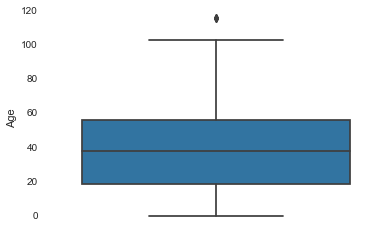

In [23]:
sns.boxplot(data=df, y='Age')

### DATA CLEANING

#### No Show

TypeError: string indices must be integers

#### Age Feature

The Patients' Ages are between -1 and 115. So I'm going to filter the dataframe between 0 and 100 years old.

In [26]:
df = df[(df.Age >= 0) & (df.Age <= 100)]

#### Gender

#### Neighborhood Feature

In [27]:
nh = df.Neighborhood.unique()
nh.sort()
print(nh)

['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITARARÉ' 'JABOUR'
 'JARDIM CAMBURI' 'JARDIM DA PENHA' 'JESUS DE NAZARETH' 'JOANA D´ARC'
 'JUCUTUQUARA' 'MARIA ORTIZ' 'MARUÍPE' 'MATA DA PRAIA' 'MONTE BELO'
 'MORADA DE CAMBURI' 'MÁRIO CYPRESTE' 'NAZARETH' 'NOVA PALESTINA'
 'PARQUE INDUSTRIAL' 'PARQUE MOSCOSO' 'PIEDADE' 'PONTAL DE CAMBURI'
 'PRAIA DO CANTO' 'PRAIA DO SUÁ' 'REDENÇÃO' 'REPÚBLICA' 'RESISTÊNCIA'
 'ROMÃO' 'SANTA CECÍLIA' 'SANTA CLARA' 'SANTA HELENA' 'SANTA LUÍZA'
 'SANTA LÚCIA' 'SANTA MARTHA' 'SANTA TEREZA

'ILHAS OCEÂNICAS DE TRINDADE' isn't a part of the neighborhood. 


In [28]:
df.drop(df[df['Neighborhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'].index, inplace=True)

#### Schedule & Appointment Features

In [18]:
#time_format= '%Y-%m-%d %H:%M:%S'

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [19]:
df['ScheduledDay'] = df['ScheduledDay'].dt.normalize() #droptime
df['ScheduledTime'] = df['ScheduledDay'].dt.time

df['WaitingDays'] = df['AppointmentDay'] - df['ScheduledDay']
df['WaitingDays'] = df['WaitingDays'].dt.days 

#### DATA WRANGLING SUMMARY

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighborhood    110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMSSent         110527 non-null  int64              
 13  NoShow        

In [31]:
df.count()

PatientId         110517
AppointmentID     110517
Gender            110517
ScheduledDay      110517
AppointmentDay    110517
Age               110517
Neighborhood      110517
Scholarship       110517
Hypertension      110517
Diabetes          110517
Alcoholism        110517
Handicap          110517
SMSSent           110517
NoShow            110517
dtype: int64

In [32]:
df.sample()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
63659,836792694395293,5646447,F,2016-05-02 11:22:05+00:00,2016-05-02 00:00:00+00:00,76,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [33]:
assert df.notnull().all().all()

#### Check for Duplicated Rows.

In [52]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow


#### Print the categorical columns and their associated levels.

In [53]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Gender,2
1,ScheduledDay,103549
2,AppointmentDay,27
3,Neighborhood,81
4,NoShow,2


### EXPORT DATA

In [34]:
df.to_csv('data/step2_output.csv', index=False)

In [17]:
#profile = ProfileReport(df, title='Med NoShow Profiling Report')

In [16]:
#profile.to_notebook_iframe()